In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [19]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing


In [3]:
df=pd.read_csv('Bangalore_Restaurants.csv')
df

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.2,524.0,https://www.zomato.com/bangalore/windmills-cra...,"78, Immaine Epip Industrial Area, Whitefield B...",9.1888E+11,12.982413,77.721979
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.3,22100.0,https://www.zomato.com/bangalore/ctr-shri-saga...,"7th Cross, Margosa Road, Malleshwaram, Bangalore",9.18023E+11,12.998270,77.569455
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,"CV Raman Nagar, Bangalore",3.3,79.0,3.1,895.0,https://www.zomato.com/bangalore/chopstick-kit...,"Shop 4, Kalpavruksha Complex, 13th Cross, Cauv...",9.19008E+11,12.977300,77.665640
5105,Punjabi Dhaba,North Indian,600,"Jakkur, Bangalore",3.3,21.0,3.9,878.0,https://www.zomato.com/bangalore/punjabi-dhaba...,"547, Opposite Rashtrotana School, RK Hegde Nag...",9.18126E+11,13.068979,77.633497
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,"Sarjapur Road, Bangalore",3.3,36.0,3.8,4300.0,https://www.zomato.com/bangalore/abhiruchi-res...,"Site 6/2, Food World Supply Market Road, 12th ...",9.1805E+11,12.908860,77.680574
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,"Nagawara, Bangalore",3.3,97.0,NaN,0.0,https://www.zomato.com/bangalore/the-q-restaur...,"Opposite To Manyata Tech Park, Outer Ring Road...",9.18951E+11,12.913854,77.608900


In [4]:
df.isnull().any()

Restaurant_Name          False
Category                 False
Pricing_for_2            False
Locality                 False
Dining_Rating             True
Dining_Review_Count       True
Delivery_Rating           True
Delivery_Rating_Count     True
Website                  False
Address                  False
Phone_No                 False
Latitude                 False
Longitude                False
dtype: bool

In [5]:
df.rename(columns = {'Dining_Rating':'DiningRating'}, inplace = True)
df.rename(columns = {'Dining_Review_Count':'DiningRC'}, inplace = True)
df.rename(columns = {'Delivery_Rating':'DeliveryRating'}, inplace = True)
df.rename(columns = {'Delivery_Rating_Count':'DeliveryRC'}, inplace = True)
df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC,Website,Address,Phone_No,Latitude,Longitude
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.2,524.0,https://www.zomato.com/bangalore/windmills-cra...,"78, Immaine Epip Industrial Area, Whitefield B...",9.1888E+11,12.982413,77.721979
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.3,22100.0,https://www.zomato.com/bangalore/ctr-shri-saga...,"7th Cross, Margosa Road, Malleshwaram, Bangalore",9.18023E+11,12.998270,77.569455
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,"CV Raman Nagar, Bangalore",3.3,79.0,3.1,895.0,https://www.zomato.com/bangalore/chopstick-kit...,"Shop 4, Kalpavruksha Complex, 13th Cross, Cauv...",9.19008E+11,12.977300,77.665640
5105,Punjabi Dhaba,North Indian,600,"Jakkur, Bangalore",3.3,21.0,3.9,878.0,https://www.zomato.com/bangalore/punjabi-dhaba...,"547, Opposite Rashtrotana School, RK Hegde Nag...",9.18126E+11,13.068979,77.633497
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,"Sarjapur Road, Bangalore",3.3,36.0,3.8,4300.0,https://www.zomato.com/bangalore/abhiruchi-res...,"Site 6/2, Food World Supply Market Road, 12th ...",9.1805E+11,12.908860,77.680574
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,"Nagawara, Bangalore",3.3,97.0,NaN,0.0,https://www.zomato.com/bangalore/the-q-restaur...,"Opposite To Manyata Tech Park, Outer Ring Road...",9.18951E+11,12.913854,77.608900


In [6]:
New_df=df.drop(['Website','Address','Latitude','Longitude','Phone_No'],axis=1)

In [7]:
A=New_df['DiningRating'].mean()
New_df['DiningRating'].fillna(value=A,inplace=True)
B=New_df['DiningRC'].mean()
New_df['DiningRC'].fillna(value=B,inplace=True)
C=New_df['DeliveryRC'].mean()
New_df['DeliveryRC'].fillna(value=C,inplace=True)
D=New_df['DeliveryRating'].mean()
New_df['DeliveryRating'].fillna(value=D,inplace=True)

In [8]:
New_df.head(7)

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.50000,838.0
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.20000,524.0
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.30000,22100.0
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.40000,372.0
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.40000,1180.0
5,BelgYum,Desserts,400,"Phoenix Marketcity Bangalore, Whitefield, Ban...",4.9,1858.0,3.83511,0.0
6,Lot Like Crepes,"Desserts, Fast Food, Beverages",500,"Koramangala 7th Block, Bangalore",4.9,1083.0,3.90000,365.0


In [9]:
New_df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.50000,838.0
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.20000,524.0
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.30000,22100.0
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.40000,372.0
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.40000,1180.0
...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,"CV Raman Nagar, Bangalore",3.3,79.0,3.10000,895.0
5105,Punjabi Dhaba,North Indian,600,"Jakkur, Bangalore",3.3,21.0,3.90000,878.0
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,"Sarjapur Road, Bangalore",3.3,36.0,3.80000,4300.0
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,"Nagawara, Bangalore",3.3,97.0,3.83511,0.0


In [10]:
New_df['DeliveryRC']=New_df['DeliveryRC'].replace(0,C)
New_df['DeliveryRC']

0         838.000000
1         524.000000
2       22100.000000
3         372.000000
4        1180.000000
            ...     
5104      895.000000
5105      878.000000
5106     4300.000000
5107     1655.631249
5108       11.000000
Name: DeliveryRC, Length: 5109, dtype: float64

In [11]:
New_df['DiningRating']=New_df['DiningRating'].replace(0,A)
New_df['DiningRC']=New_df['DiningRC'].replace(0,B)
New_df['DeliveryRating']=New_df['DeliveryRating'].replace(0,D)
New_df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.50000,838.000000
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.20000,524.000000
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.30000,22100.000000
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.40000,372.000000
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.40000,1180.000000
...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,"CV Raman Nagar, Bangalore",3.3,79.0,3.10000,895.000000
5105,Punjabi Dhaba,North Indian,600,"Jakkur, Bangalore",3.3,21.0,3.90000,878.000000
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,"Sarjapur Road, Bangalore",3.3,36.0,3.80000,4300.000000
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,"Nagawara, Bangalore",3.3,97.0,3.83511,1655.631249


In [12]:
New_df['Locality']=New_df['Locality'].apply(lambda x:x.split(',')[0])
New_df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,Indiranagar,4.9,2790.0,4.50000,838.000000
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,Windmills Craftworks,4.9,6543.0,4.20000,524.000000
2,CTR Shri Sagar,South Indian,150,Malleshwaram,4.9,4837.0,4.30000,22100.000000
3,Brahmin's Coffee Bar,South Indian,100,Basavanagudi,4.9,2975.0,4.40000,372.000000
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,Indiranagar,4.9,2575.0,4.40000,1180.000000
...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,CV Raman Nagar,3.3,79.0,3.10000,895.000000
5105,Punjabi Dhaba,North Indian,600,Jakkur,3.3,21.0,3.90000,878.000000
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,Sarjapur Road,3.3,36.0,3.80000,4300.000000
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,Nagawara,3.3,97.0,3.83511,1655.631249


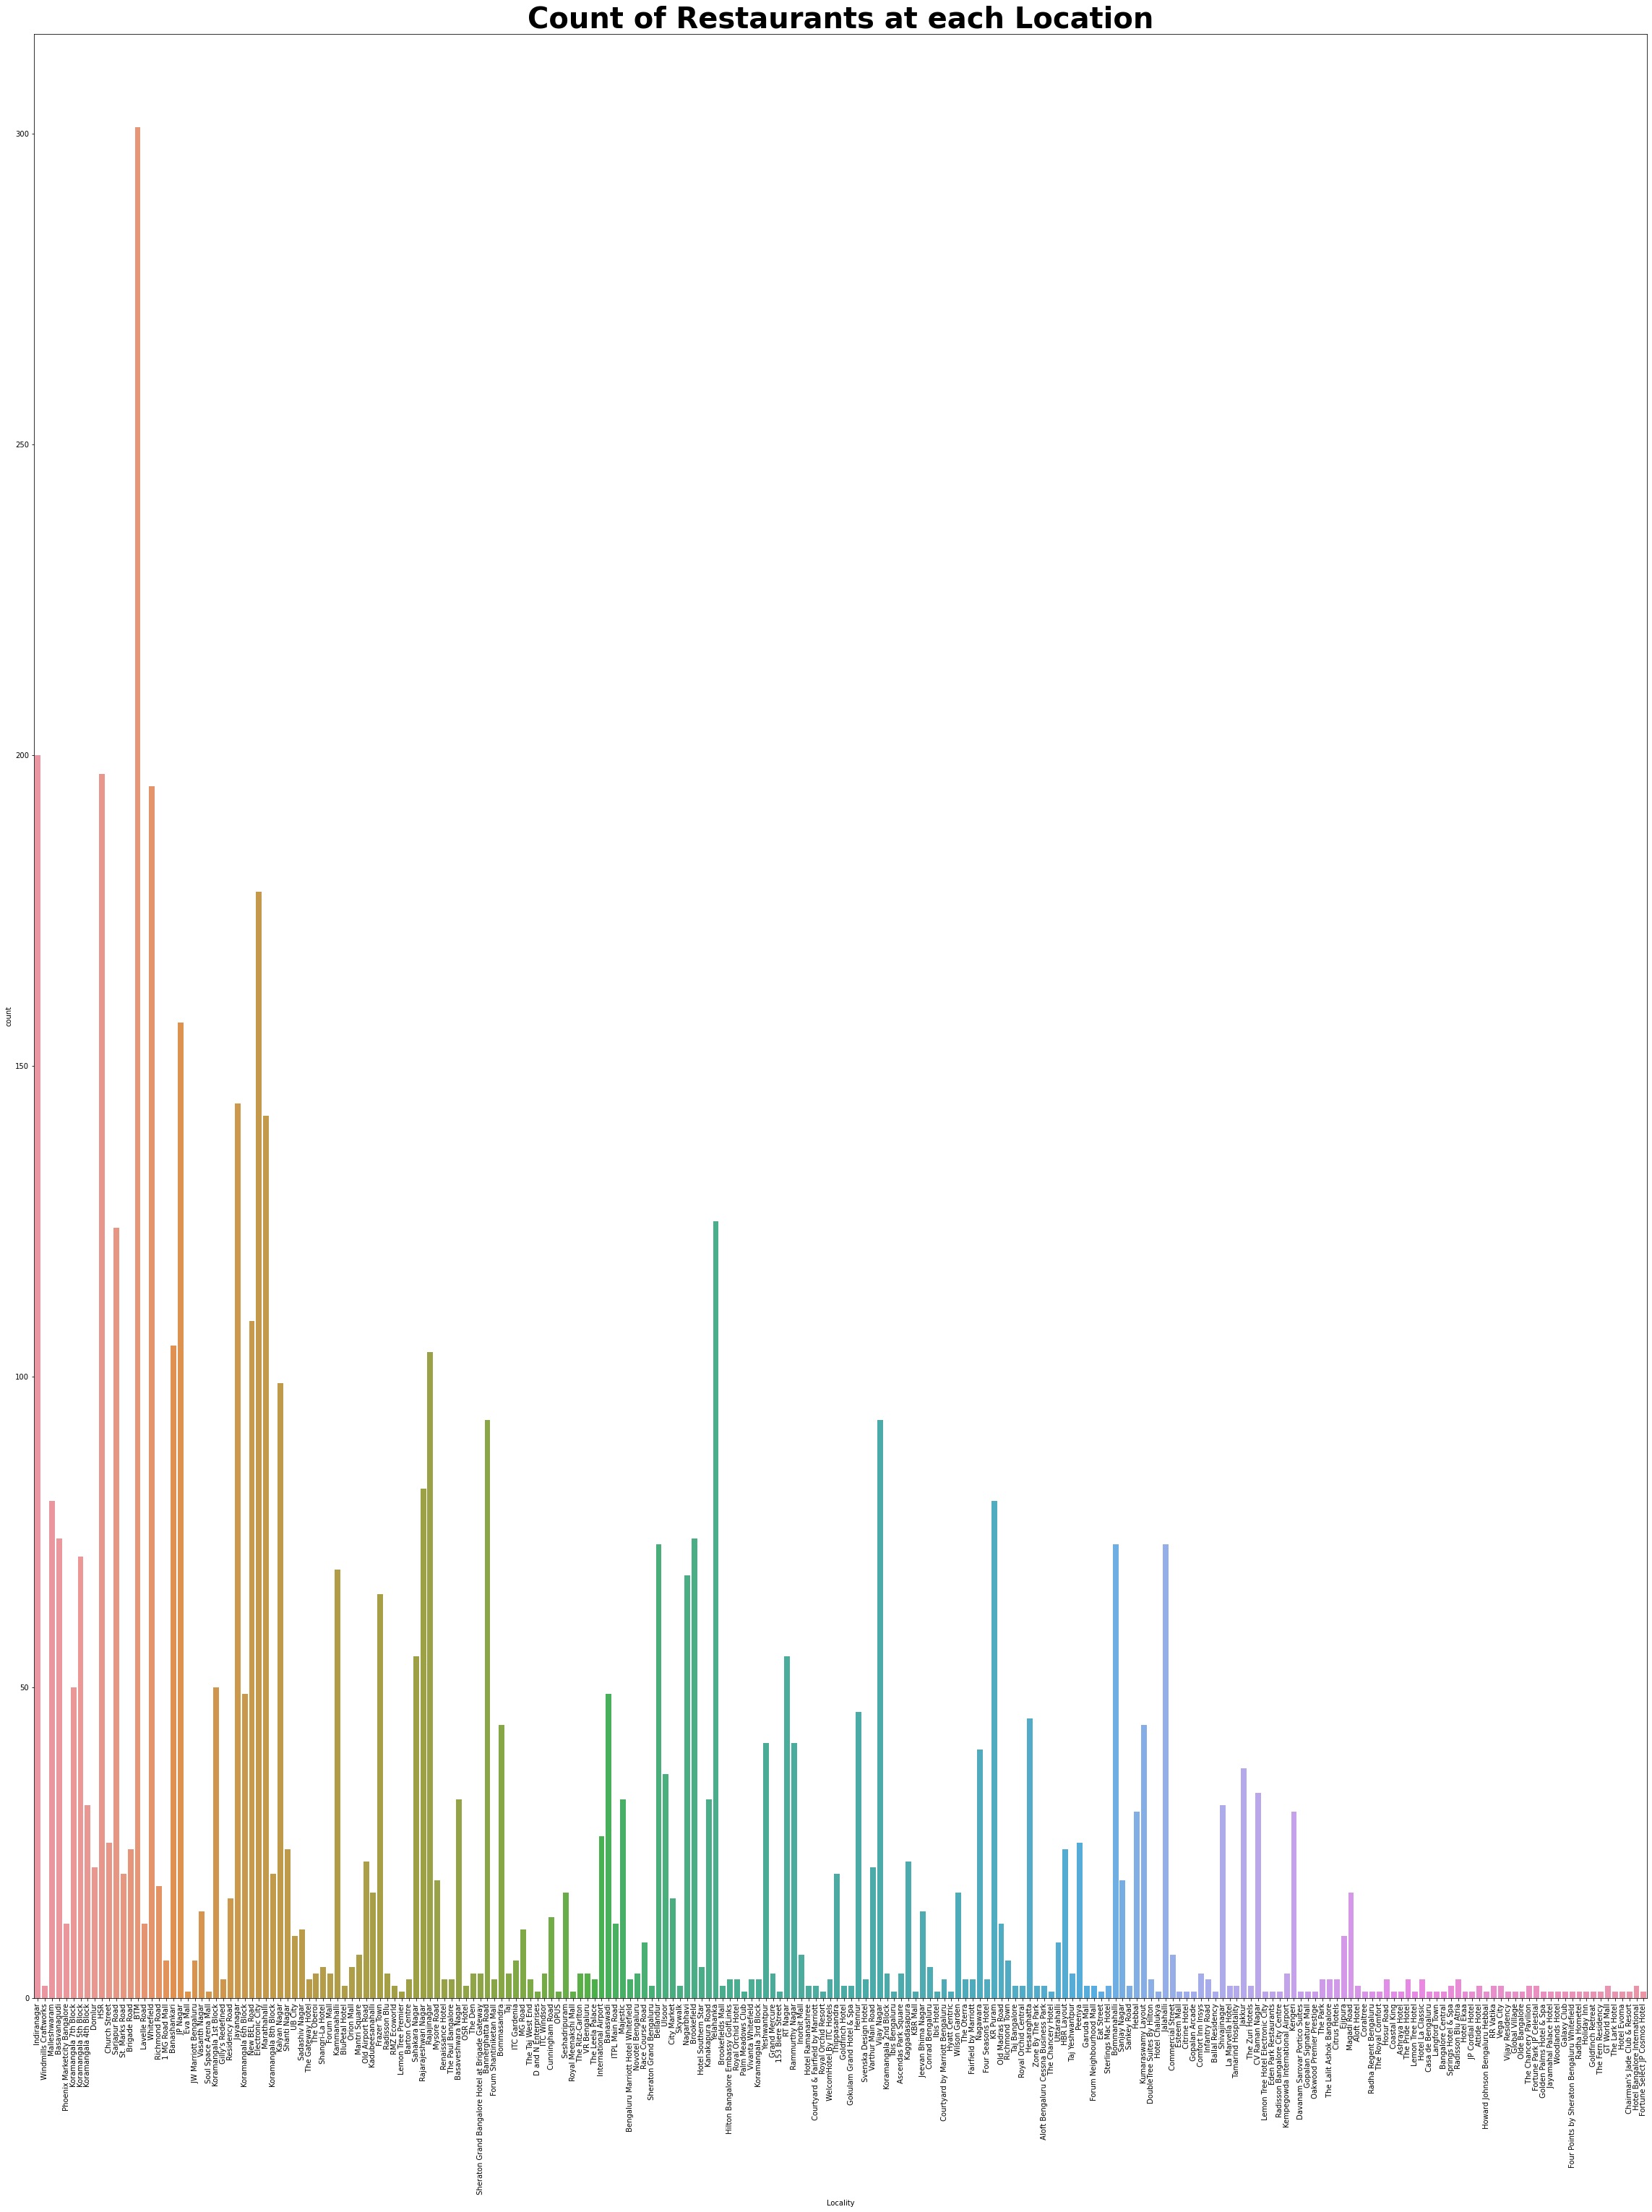

In [92]:
plt.figure(figsize=(40,50))
sns.countplot(x='Locality', data=New_df)
plt.title('Count of Restaurants at each Location', fontsize=40, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [13]:
New_df['Number_of_cuisines_offered'] = New_df['Category'].apply(lambda x : len(x.split(',')))
New_df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC,Number_of_cuisines_offered
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,Indiranagar,4.9,2790.0,4.50000,838.000000,8
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,Windmills Craftworks,4.9,6543.0,4.20000,524.000000,6
2,CTR Shri Sagar,South Indian,150,Malleshwaram,4.9,4837.0,4.30000,22100.000000,1
3,Brahmin's Coffee Bar,South Indian,100,Basavanagudi,4.9,2975.0,4.40000,372.000000,1
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,Indiranagar,4.9,2575.0,4.40000,1180.000000,3
...,...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,CV Raman Nagar,3.3,79.0,3.10000,895.000000,3
5105,Punjabi Dhaba,North Indian,600,Jakkur,3.3,21.0,3.90000,878.000000,1
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,Sarjapur Road,3.3,36.0,3.80000,4300.000000,6
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,Nagawara,3.3,97.0,3.83511,1655.631249,3


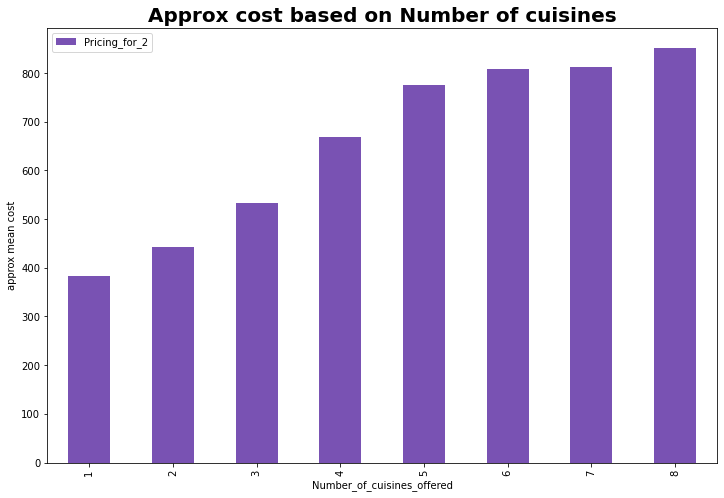

In [34]:
a = New_df.groupby('Number_of_cuisines_offered').agg({'Pricing_for_2':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#7952B3')
plt.title('Approx cost based on Number of cuisines', fontsize=20, fontweight='bold')
plt.ylabel('approx mean cost')
plt.legend()
plt.show()

In [ ]:
plt.title("Distribution of mean avg cost at different location")
sns.distplot(a["Pricing_for_2"])

In [14]:
New_df


,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC,Number_of_cuisines_offered
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,Indiranagar,4.9,2790.0,4.50000,838.000000,8
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,Windmills Craftworks,4.9,6543.0,4.20000,524.000000,6
2,CTR Shri Sagar,South Indian,150,Malleshwaram,4.9,4837.0,4.30000,22100.000000,1
3,Brahmin's Coffee Bar,South Indian,100,Basavanagudi,4.9,2975.0,4.40000,372.000000,1
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,Indiranagar,4.9,2575.0,4.40000,1180.000000,3
...,...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,"Chinese, Momos, Seafood",600,CV Raman Nagar,3.3,79.0,3.10000,895.000000,3
5105,Punjabi Dhaba,North Indian,600,Jakkur,3.3,21.0,3.90000,878.000000,1
5106,Abhiruchi Restaurant,"Biryani, Andhra, North Indian, Chinese, Hydera...",550,Sarjapur Road,3.3,36.0,3.80000,4300.000000,6
5107,The Q Restaurant,"North Indian, Chinese, Kerala",550,Nagawara,3.3,97.0,3.83511,1655.631249,3


In [15]:
New_df['Category'] = New_df['Category'].apply(lambda x : x.split(',')[0])

In [16]:
New_df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC,Number_of_cuisines_offered
0,Burma Burma,Asian,1500,Indiranagar,4.9,2790.0,4.50000,838.000000,8
1,Windmills Craftworks,Continental,2500,Windmills Craftworks,4.9,6543.0,4.20000,524.000000,6
2,CTR Shri Sagar,South Indian,150,Malleshwaram,4.9,4837.0,4.30000,22100.000000,1
3,Brahmin's Coffee Bar,South Indian,100,Basavanagudi,4.9,2975.0,4.40000,372.000000,1
4,Milano Ice Cream,Desserts,400,Indiranagar,4.9,2575.0,4.40000,1180.000000,3
...,...,...,...,...,...,...,...,...,...
5104,Chopstick Kitchen,Chinese,600,CV Raman Nagar,3.3,79.0,3.10000,895.000000,3
5105,Punjabi Dhaba,North Indian,600,Jakkur,3.3,21.0,3.90000,878.000000,1
5106,Abhiruchi Restaurant,Biryani,550,Sarjapur Road,3.3,36.0,3.80000,4300.000000,6
5107,The Q Restaurant,North Indian,550,Nagawara,3.3,97.0,3.83511,1655.631249,3


In [38]:
le=preprocessing.LabelEncoder()
New_df['Category']=le.fit_transform(New_df.Category)
New_df['Pricing_for_2']=le.fit_transform(New_df.Pricing_for_2)
New_df['Locality']=le.fit_transform(New_df.Locality)
New_df['DiningRating']=le.fit_transform(New_df.DiningRating)
New_df['DeliveryRating']=le.fit_transform(New_df.DeliveryRating)
New_df['DeliveryRC']=le.fit_transform(New_df.DeliveryRC)
New_df['Number_of_cuisines_offered']=le.fit_transform(New_df.Number_of_cuisines_offered)
New_df['DiningRC']=le.fit_transform(New_df.DiningRC)


New_df.drop(New_df.index[New_df['Number_of_cuisines_offered'] == 1], inplace = True)
New_df.drop(New_df.index[New_df['Number_of_cuisines_offered'] == 0], inplace = True)
#New_df.drop(New_df.index[New_df['Pricing_for_2'] == 0], inplace = True)
#New_df.drop(New_df.index[New_df['DiningRC'] == 0], inplace = True)
#New_df.drop(New_df.index[New_df['DiningRating'] == 0], inplace = True)
#New_df.drop(New_df.index[New_df['Locality'] == 0], inplace = True)
#New_df.drop(New_df.index[New_df['DeliveryRC'] == 0], inplace = True)

New_df
cols=['Locality','Pricing_for_2','DiningRating','DiningRC','Category']
X=New_df[cols]
target=['Number_of_cuisines_offered']
y=New_df[target]
New_df

,Restaurant_Name,Category,Pricing_for_2,Locality,DiningRating,DiningRC,DeliveryRating,DeliveryRC,Number_of_cuisines_offered


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [34]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [35]:
model = clf.fit(X_train,y_train)


In [36]:
y_pred = model.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6582278481012658


In [148]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()    
model1.fit( X_train, y_train)
# Prediction on test set  
y_pred1 = model1.predict( X_test )
      
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6582278481012658

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
ac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5569620253164557

In [46]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.3363431151241535